In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [2]:
# Read the dataset

df = pd.read_csv('./data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
categorical_features = [features for features in df.columns if df[features].dtypes == 'object']
print(categorical_features)


['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [5]:
print(len(categorical_features))

23


In [6]:
# shape of the dataset
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


In [7]:
# check the duplicate
print('Duplicate :', df.duplicated().sum())

Duplicate : 0


In [8]:
df.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
# check the null value
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


**EDA**

***EDA was initally performed on the dataset before one-hot encoding was applied to understand the categorical distribution of the features***



**Attribute Information**: (classes: edible=e, poisonous=p)

**cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

**cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s

**cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

**bruises**: bruises=t,no=f

**odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

**gill-attachment**: attached=a,descending=d,free=f,notched=n

**gill-spacing**: close=c,crowded=w,distant=d

**gill-size**: broad=b,narrow=n

**gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

**stalk-shape**: enlarging=e,tapering=t

**stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

**stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s

**stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

**stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

**veil-color**: brown=n,orange=o,white=w,yellow=y

**ring-number**: none=n,one=o,two=t

**ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

**spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

**habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [10]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

- e --> Edible
- p --> Poisonous

Text(0.5, 1.0, 'Distribution of Classes')

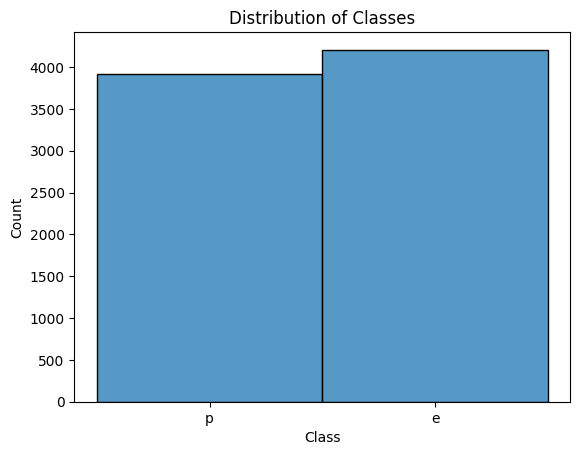

In [11]:
sns.histplot(df['class'])
# Adding labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')


In [12]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

class
e    4208
p    3916
Name: count, dtype: int64


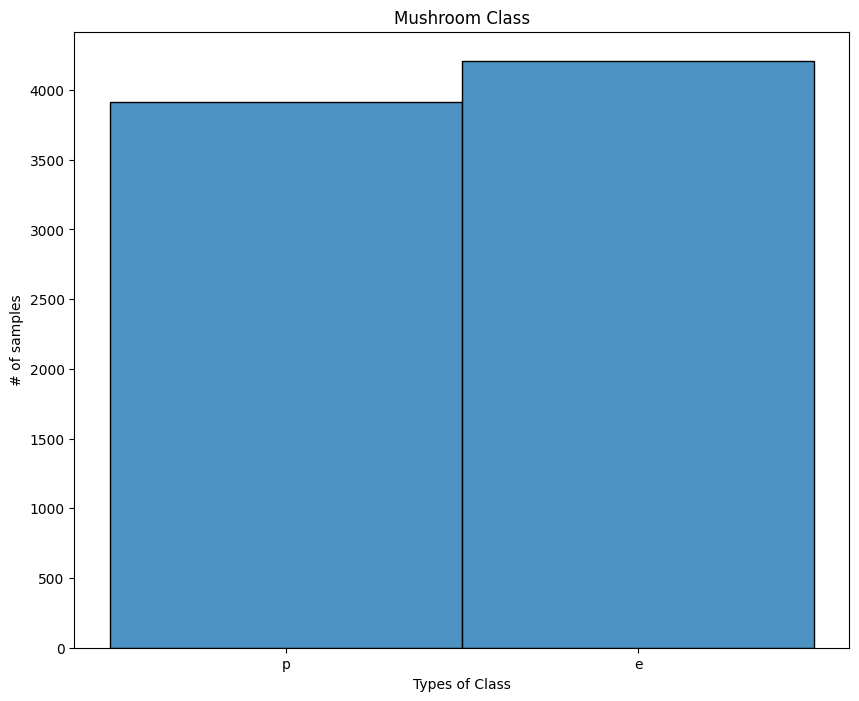

None
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64


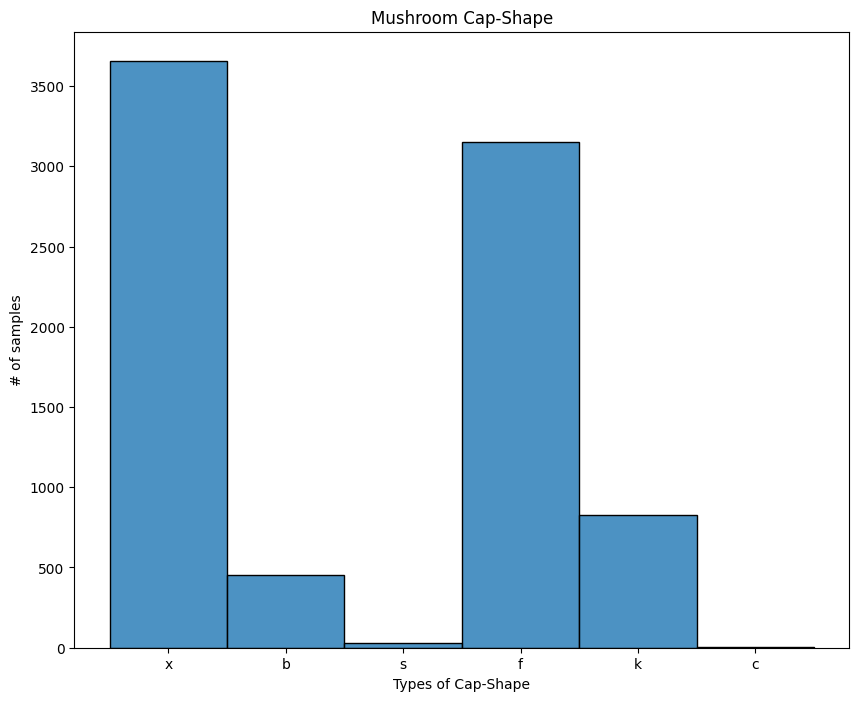

None
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64


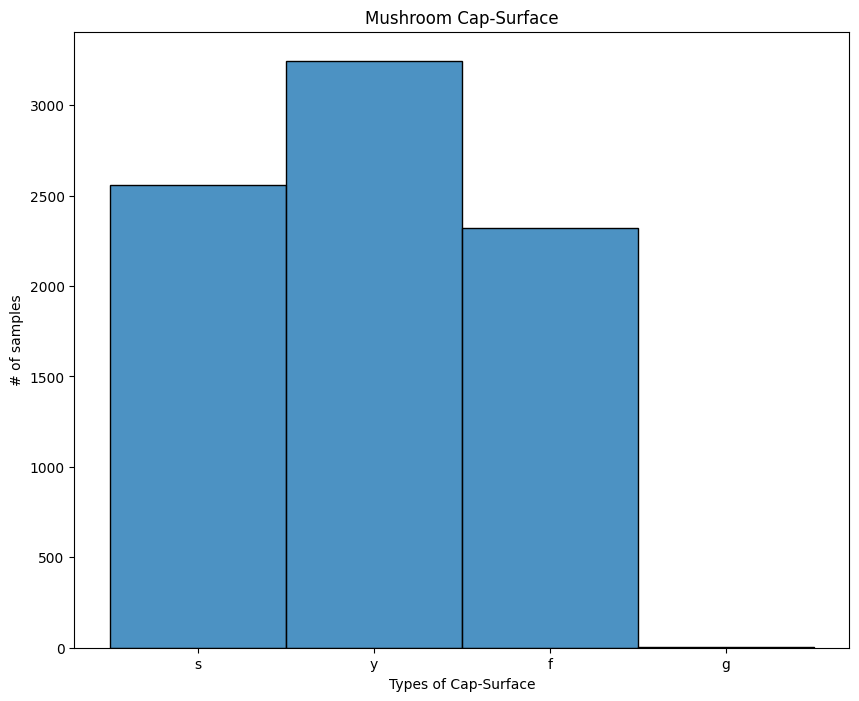

None
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64


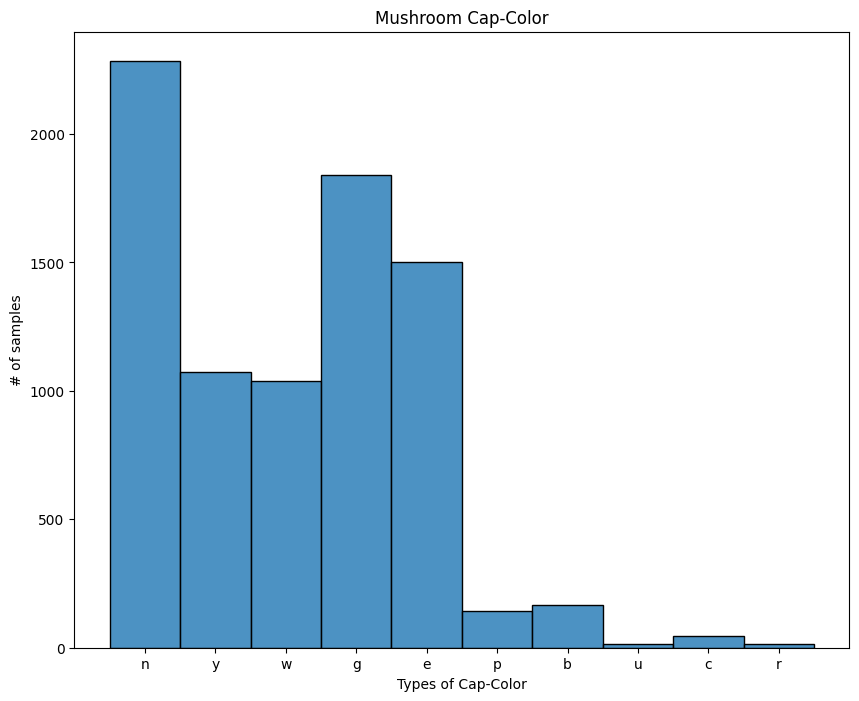

None
bruises
f    4748
t    3376
Name: count, dtype: int64


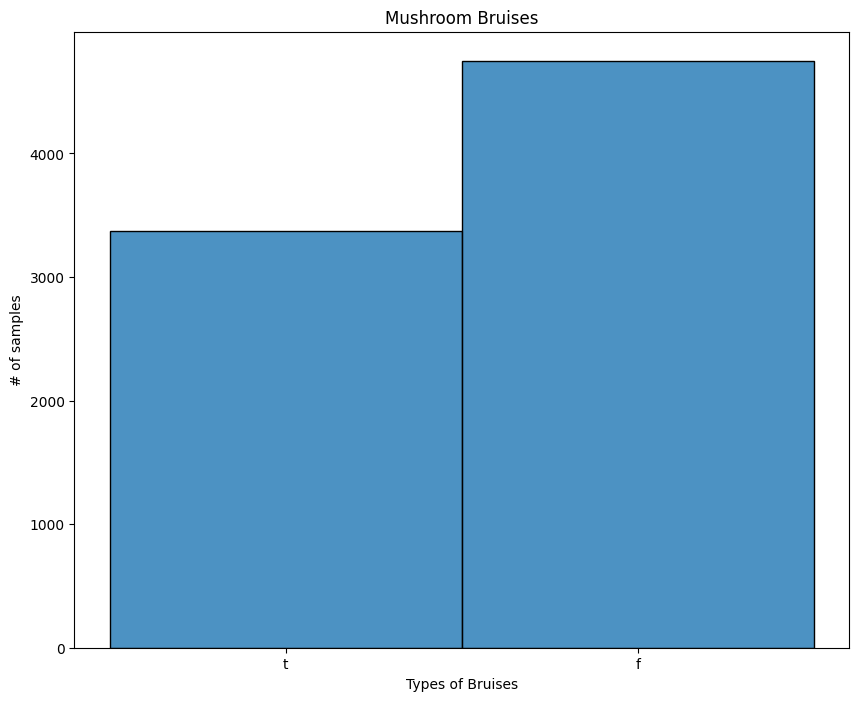

None
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64


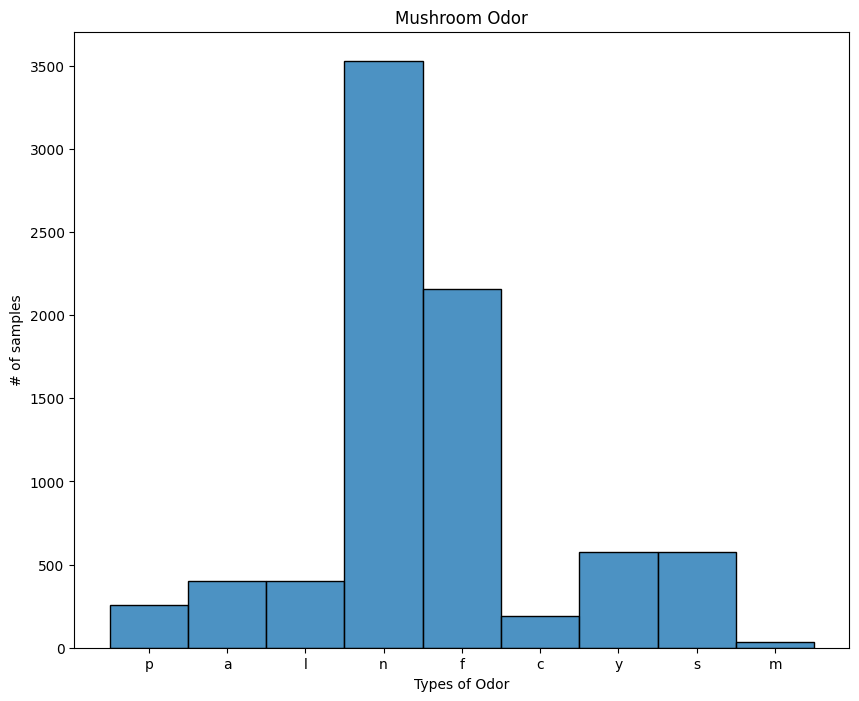

None
gill-attachment
f    7914
a     210
Name: count, dtype: int64


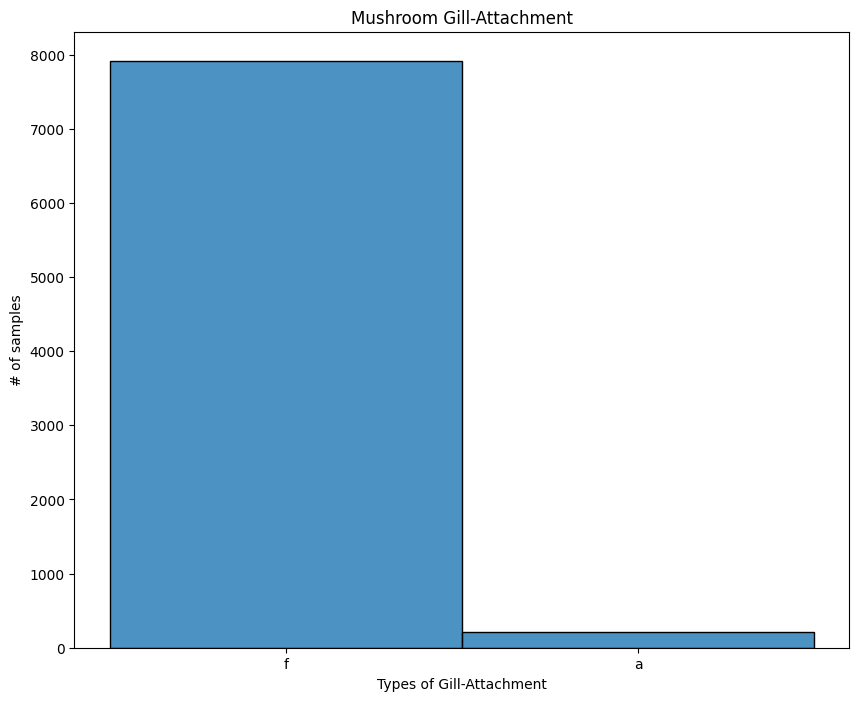

None
gill-spacing
c    6812
w    1312
Name: count, dtype: int64


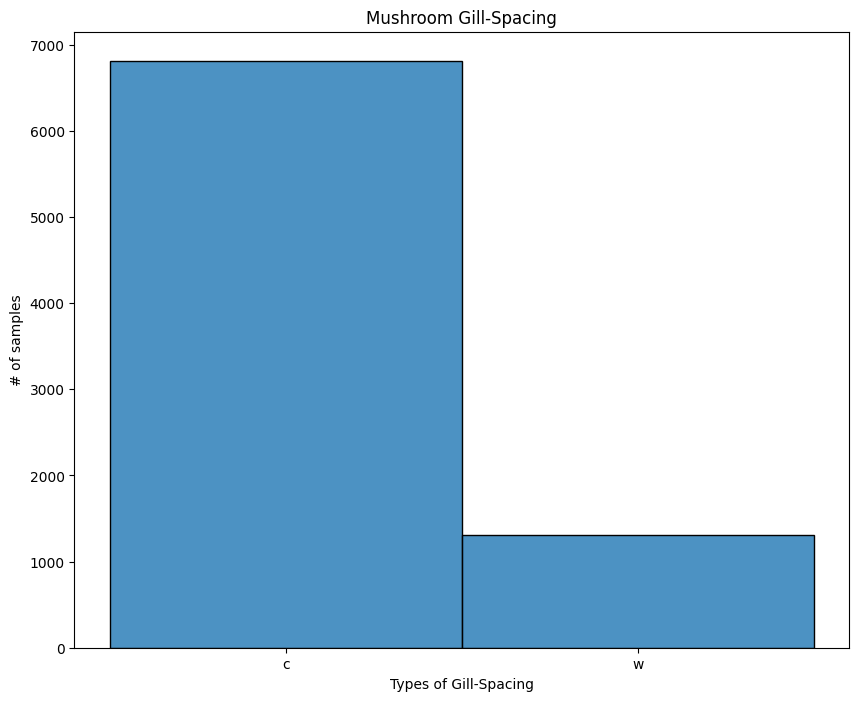

None
gill-size
b    5612
n    2512
Name: count, dtype: int64


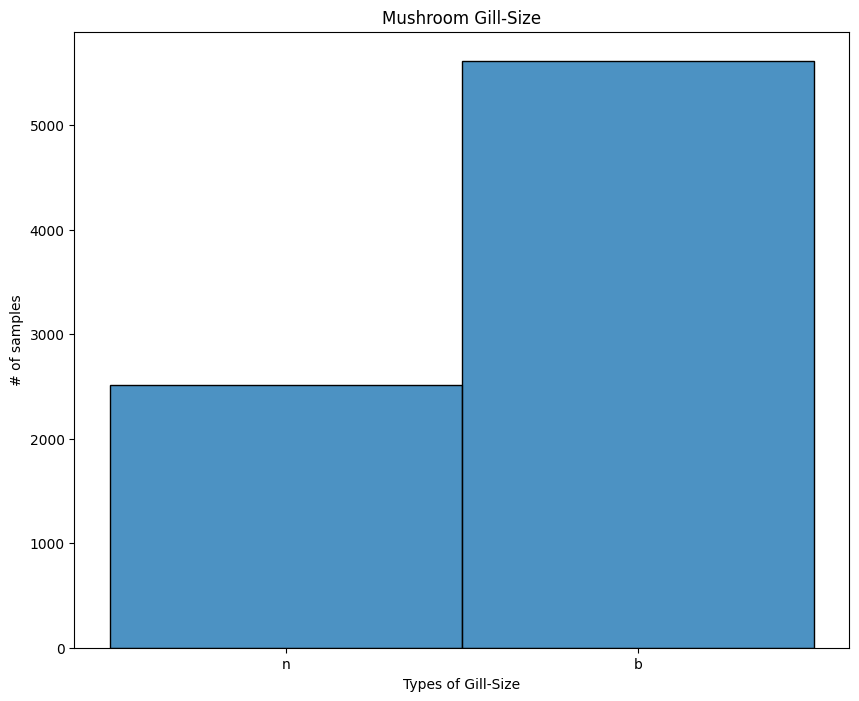

None
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64


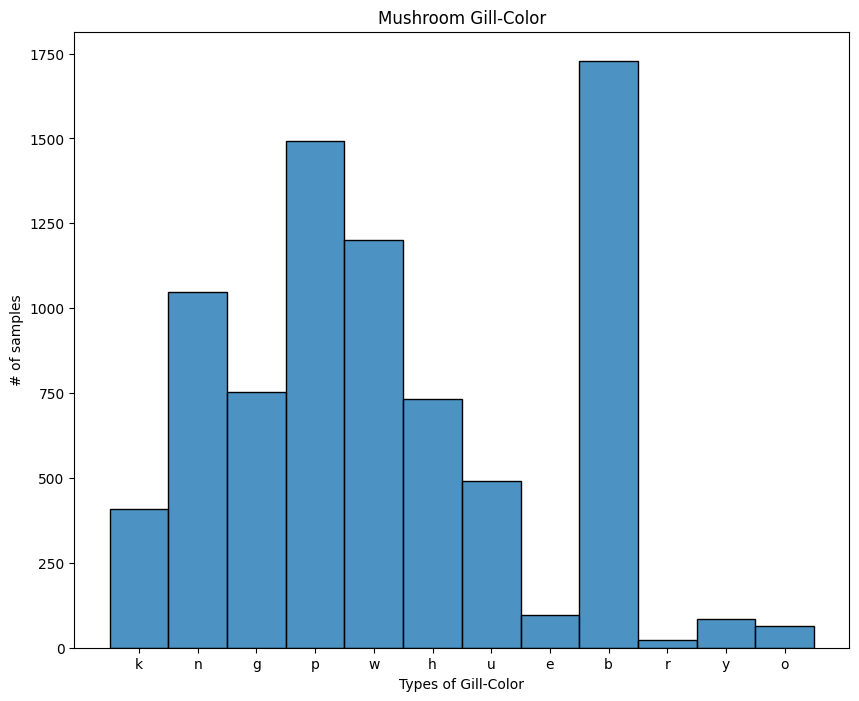

None
stalk-shape
t    4608
e    3516
Name: count, dtype: int64


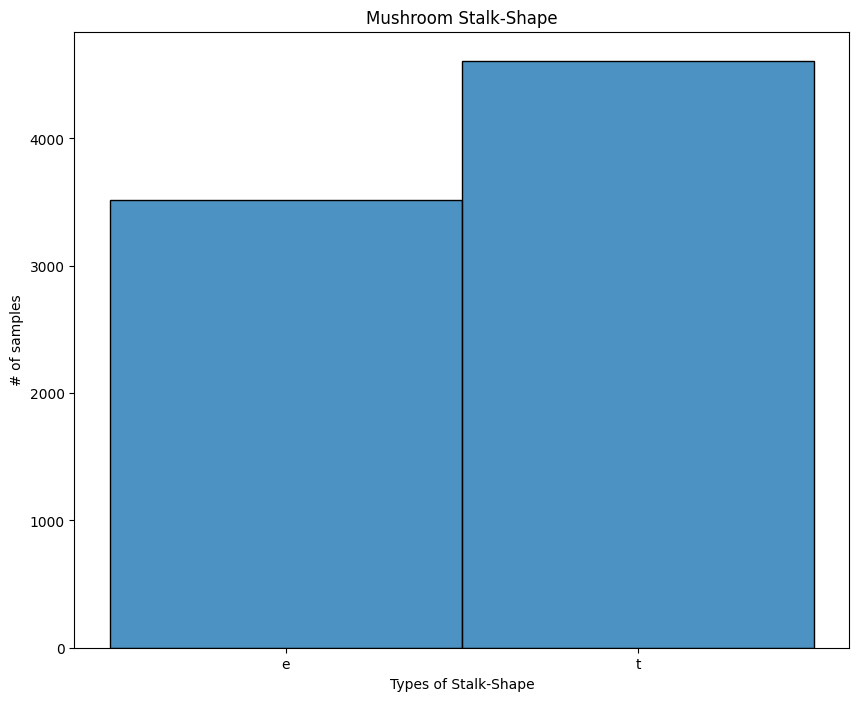

None
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64


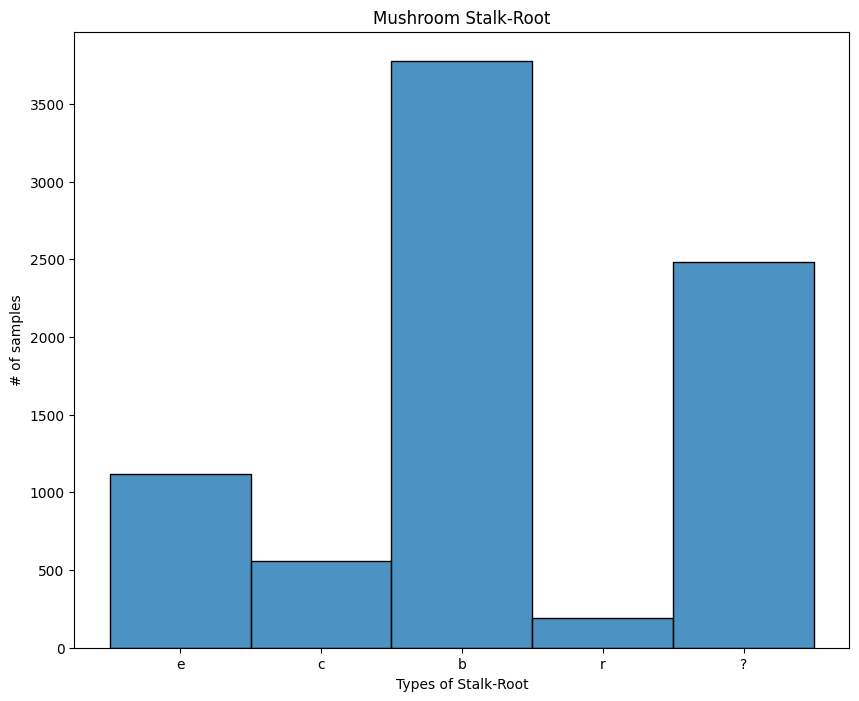

None
stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64


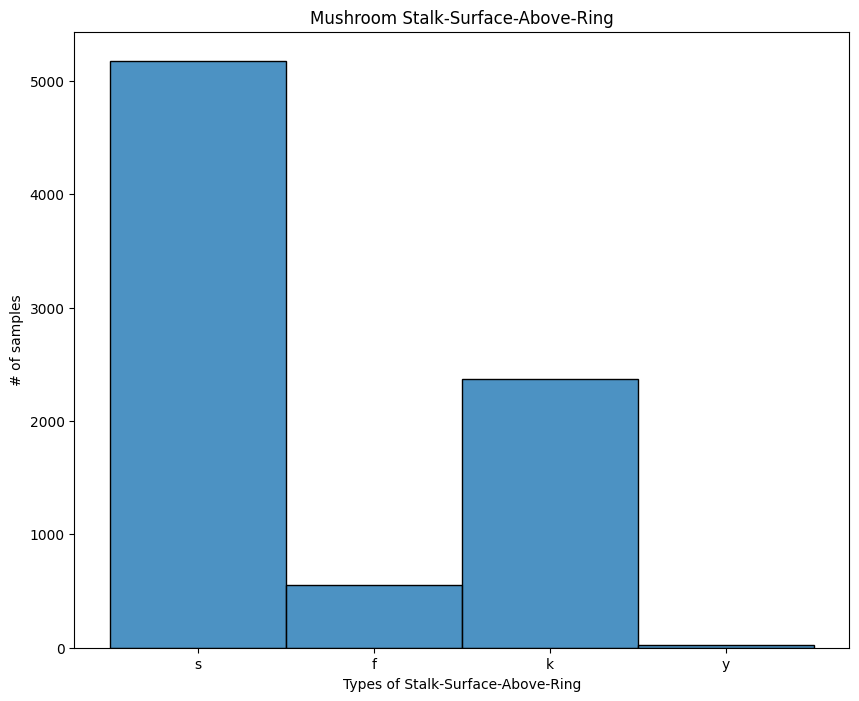

None
stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64


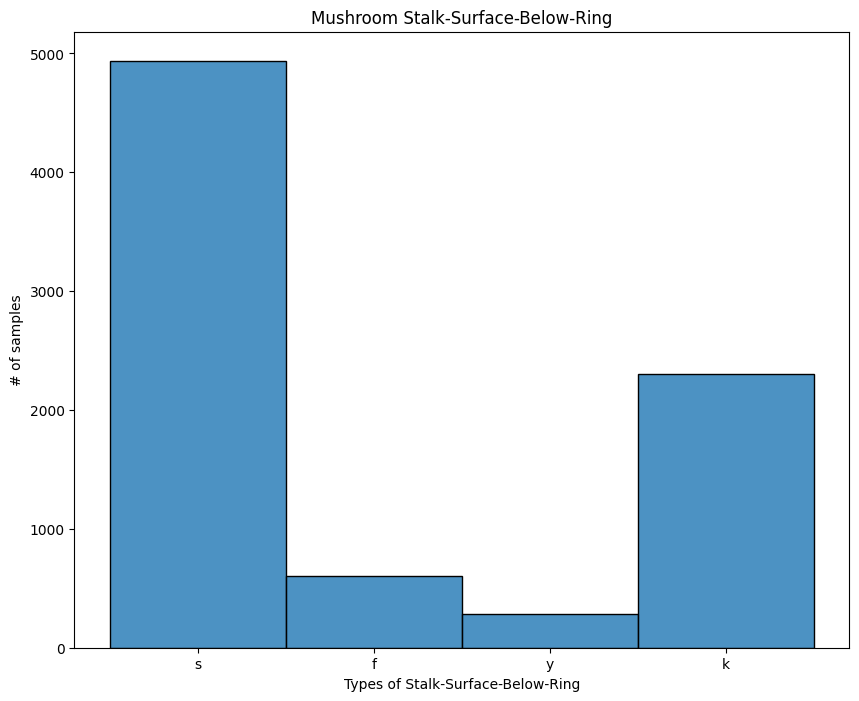

None
stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64


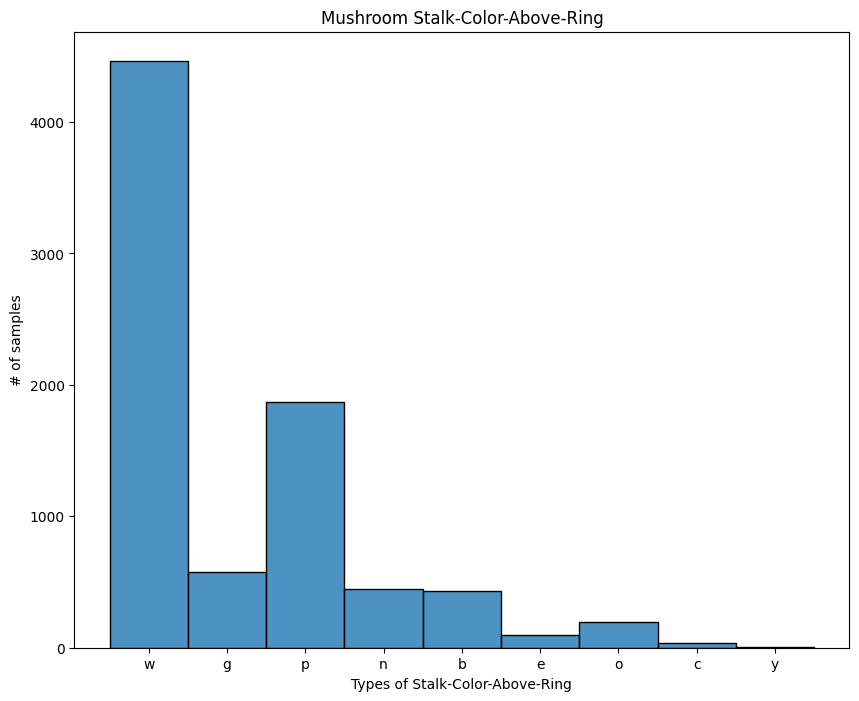

None
stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64


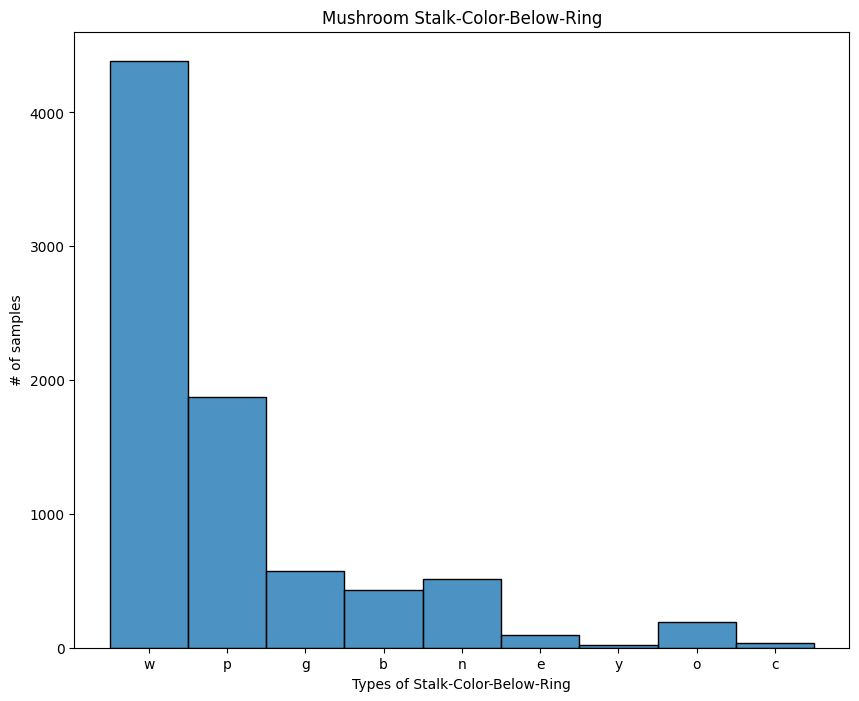

None
veil-type
p    8124
Name: count, dtype: int64


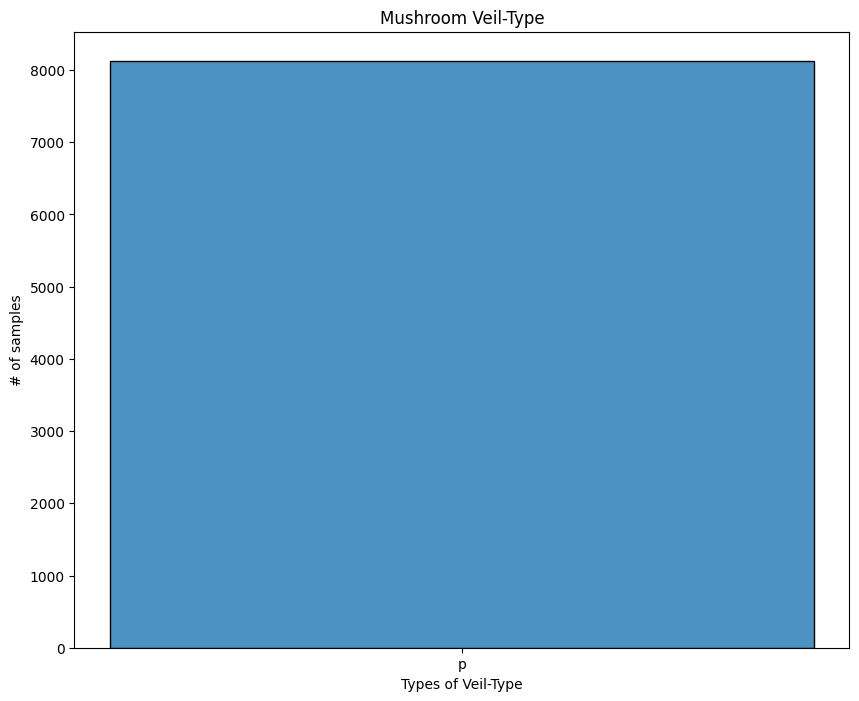

None
veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64


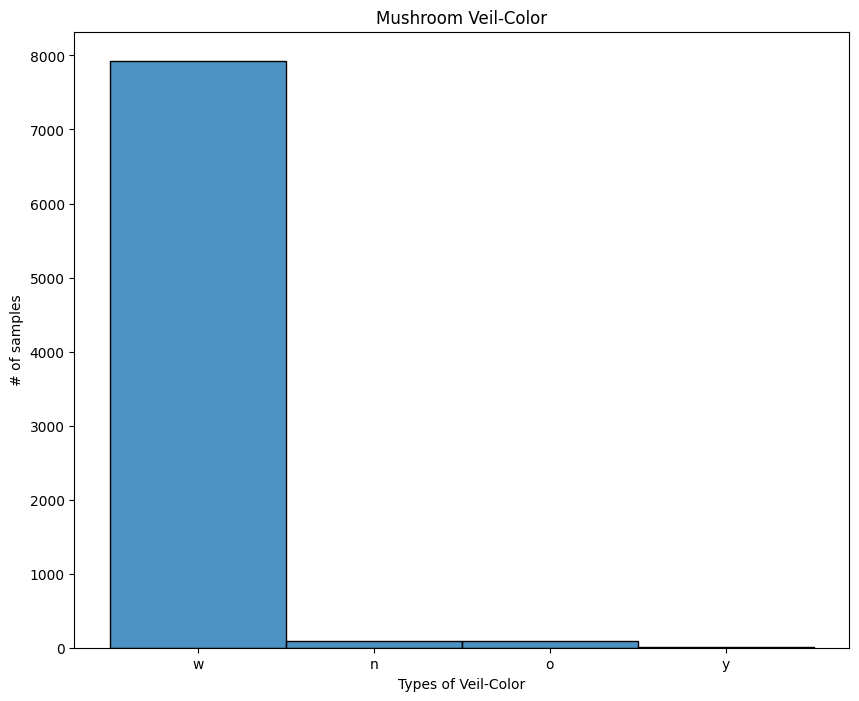

None
ring-number
o    7488
t     600
n      36
Name: count, dtype: int64


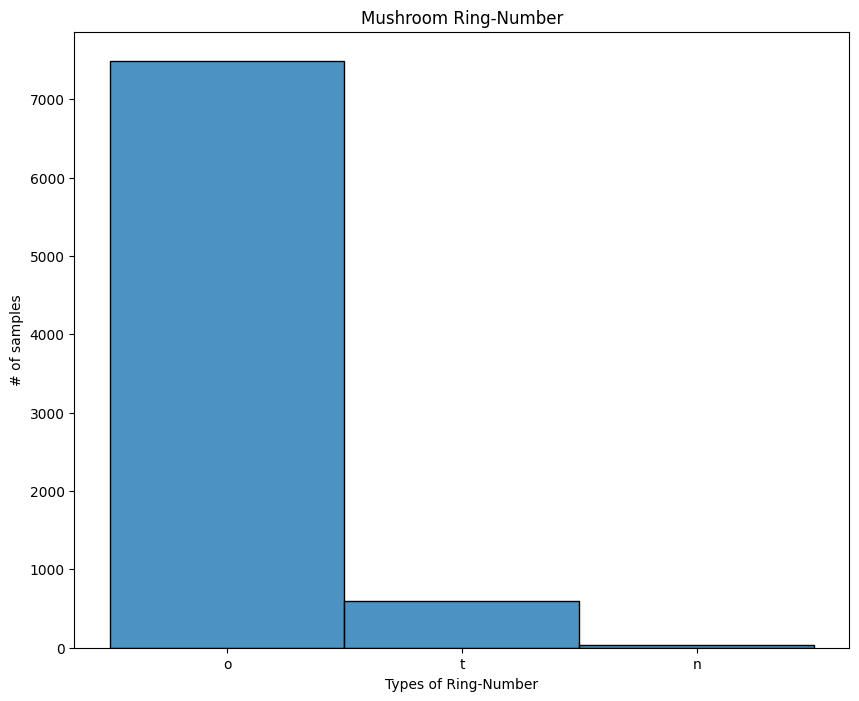

None
ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64


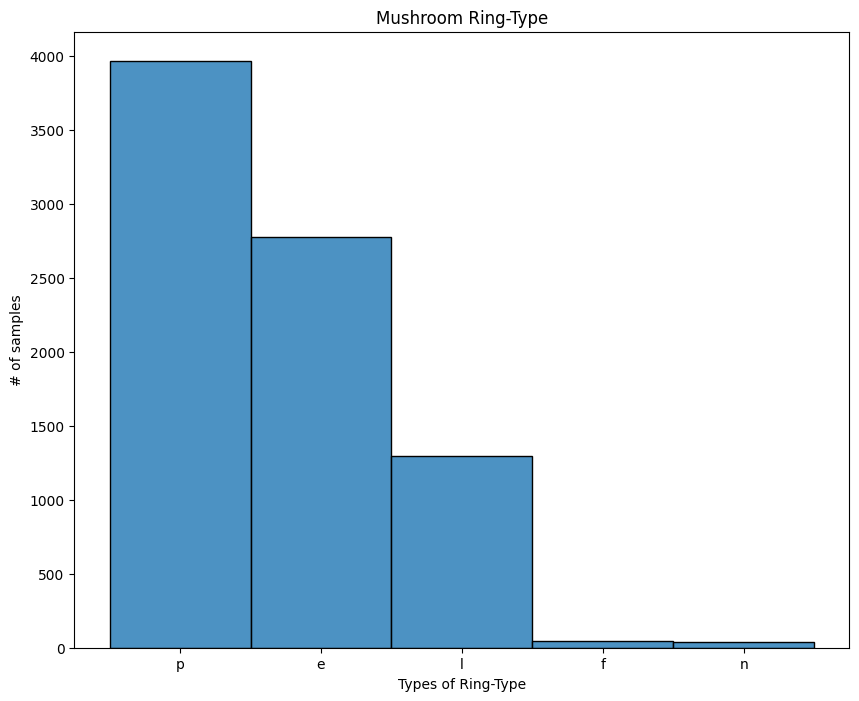

None
spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64


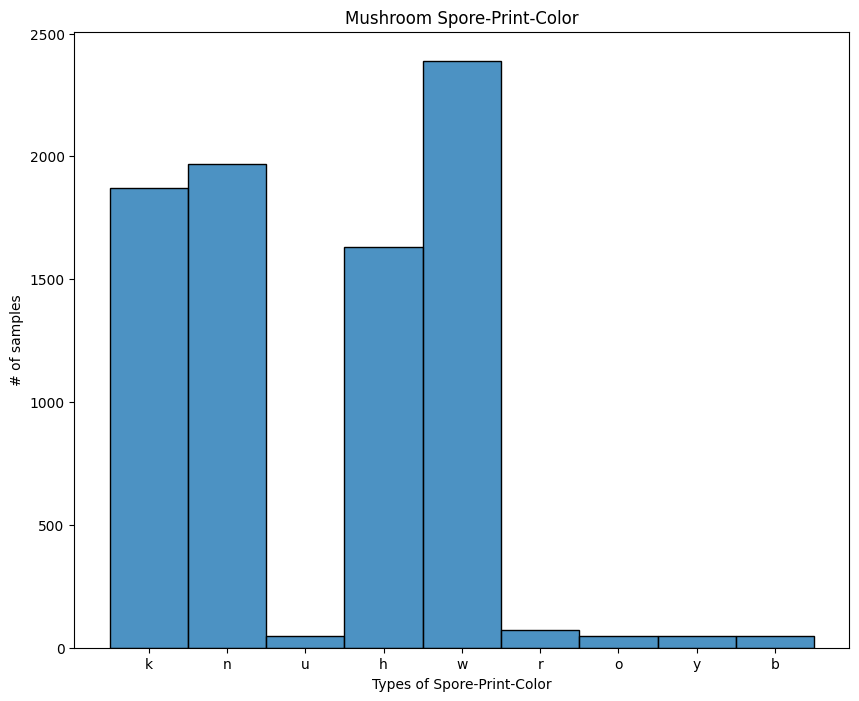

None
population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64


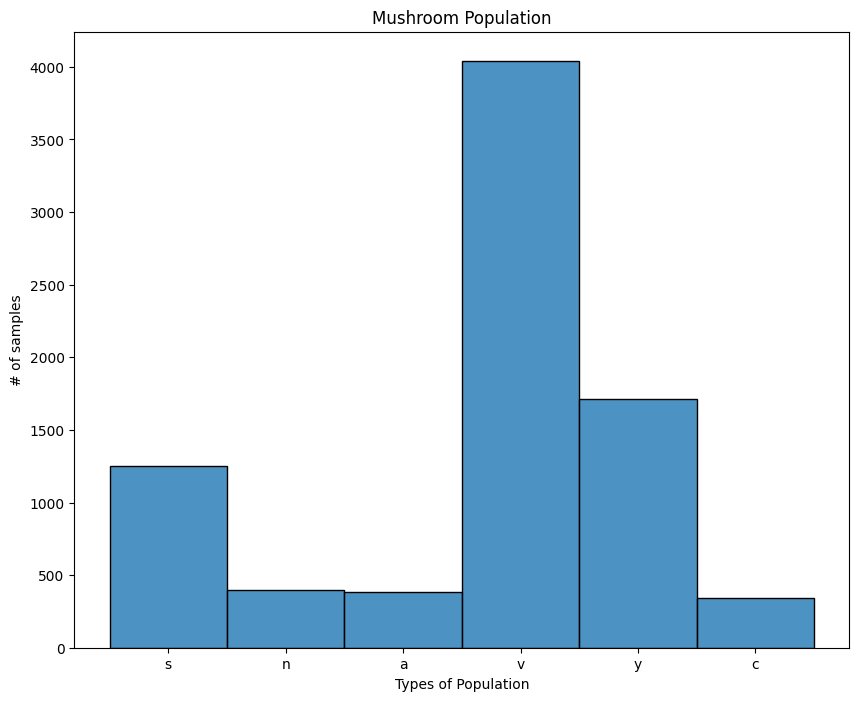

None
habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64


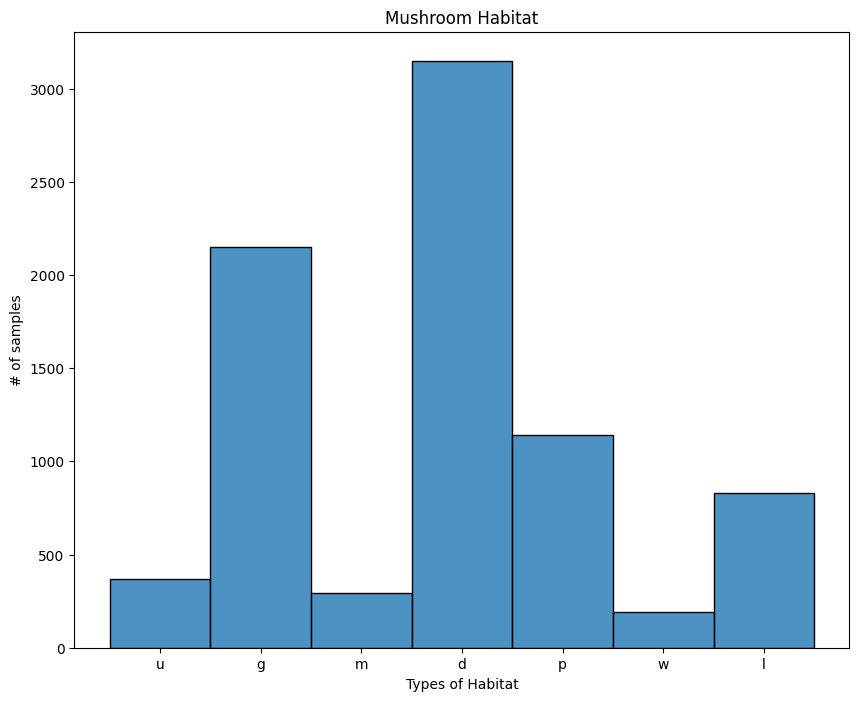

None


In [13]:
def featureplot(col):
  print(df[col].value_counts())
  plt.figure(figsize=(10, 8))
  sns.histplot(df[col],alpha =.80)
  plt.xlabel('Types of'+' '+ col.title())
  plt.ylabel('# of samples')
  plt.title('Mushroom' + ' ' + col.title())
  plt.show()
  
for i in df.columns:
  print(featureplot(i))

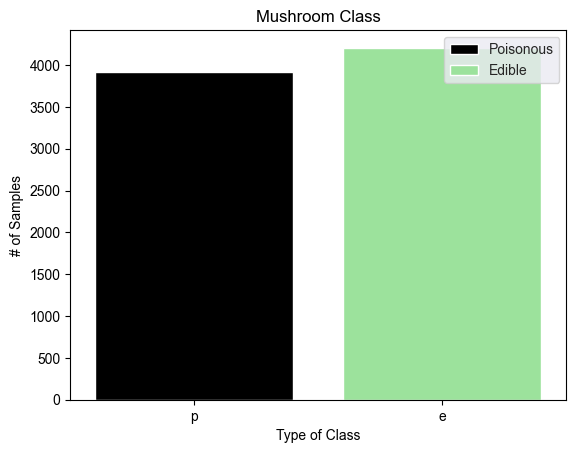

None


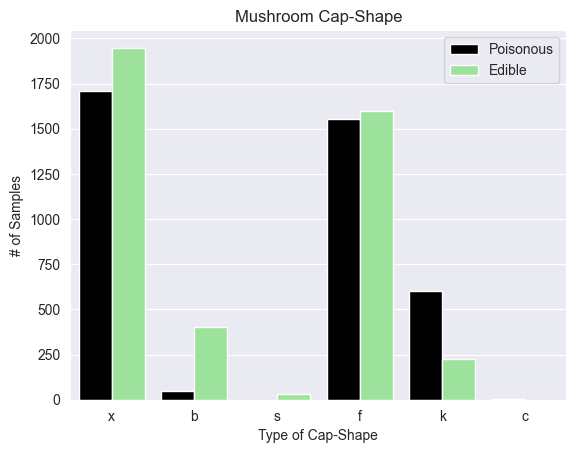

None


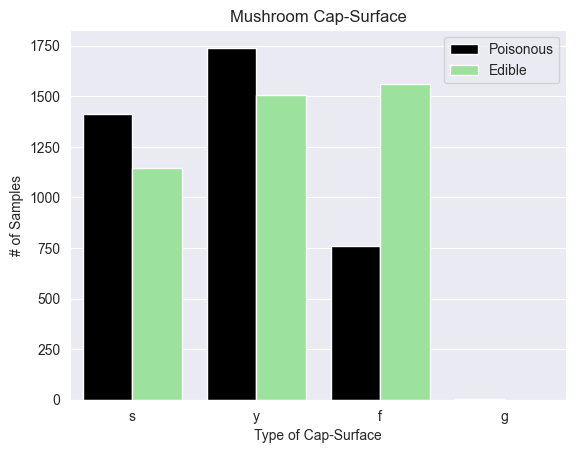

None


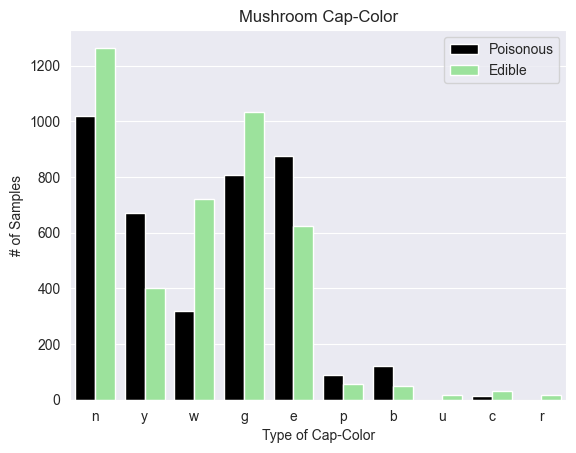

None


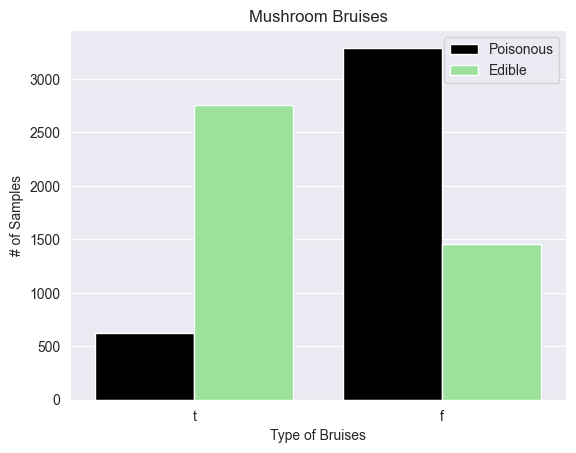

None


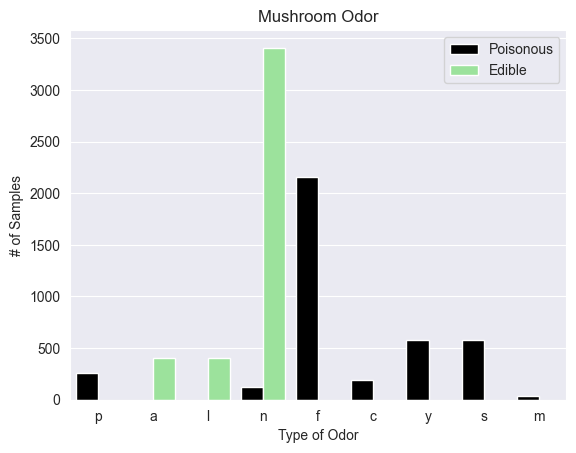

None


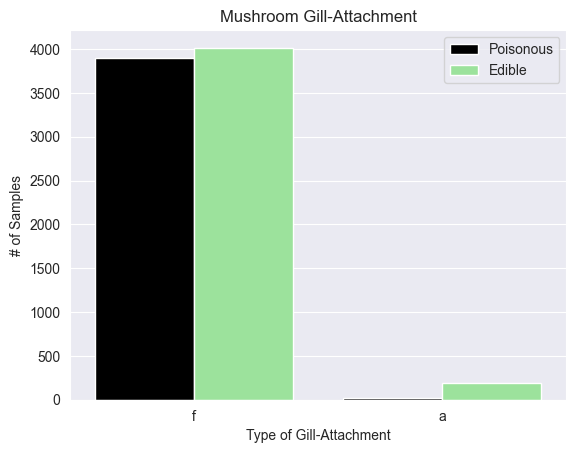

None


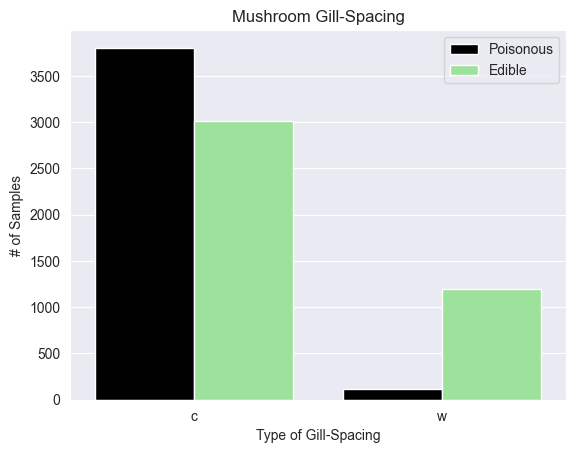

None


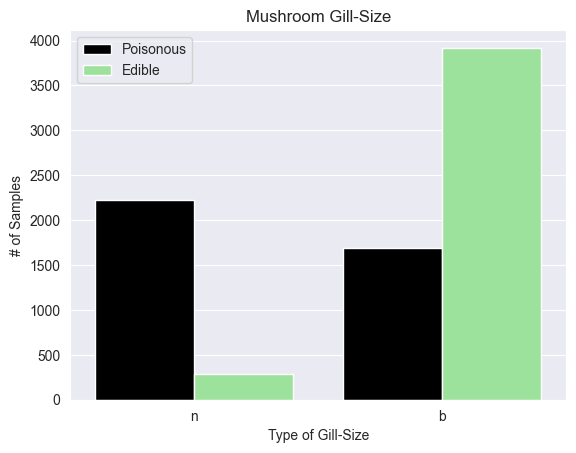

None


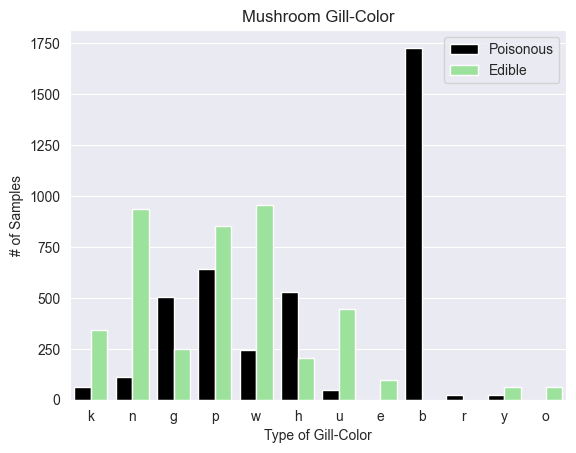

None


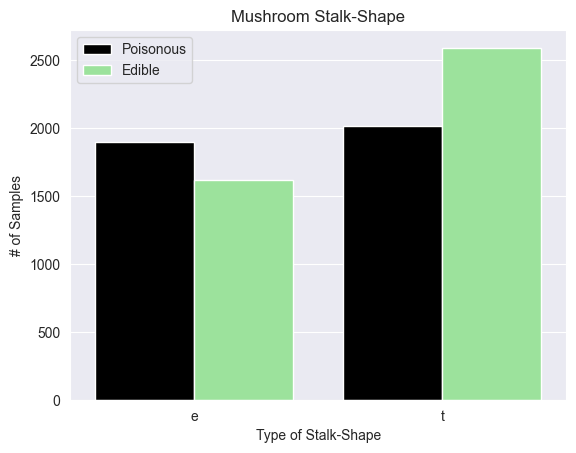

None


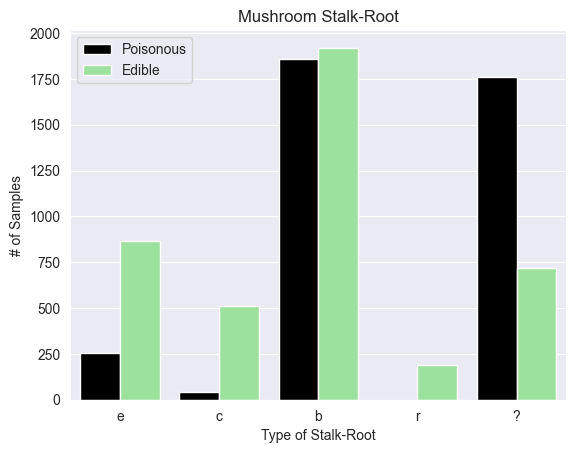

None


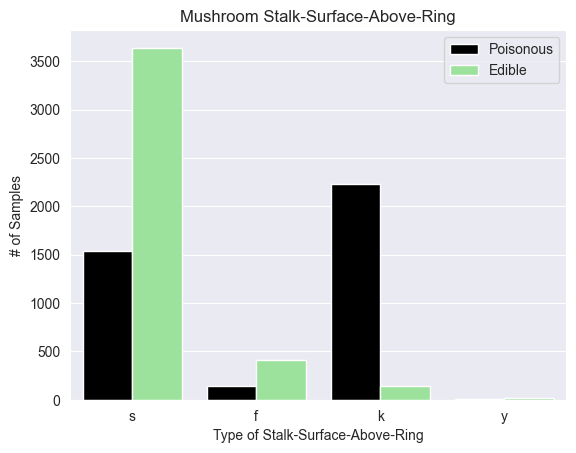

None


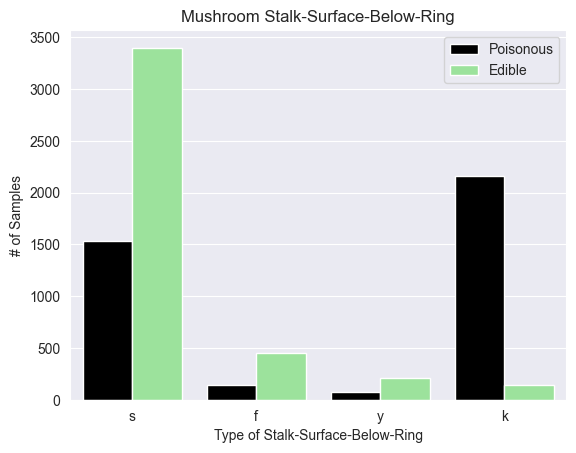

None


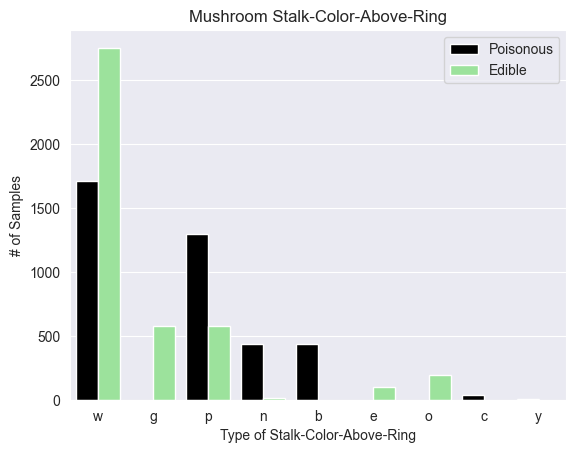

None


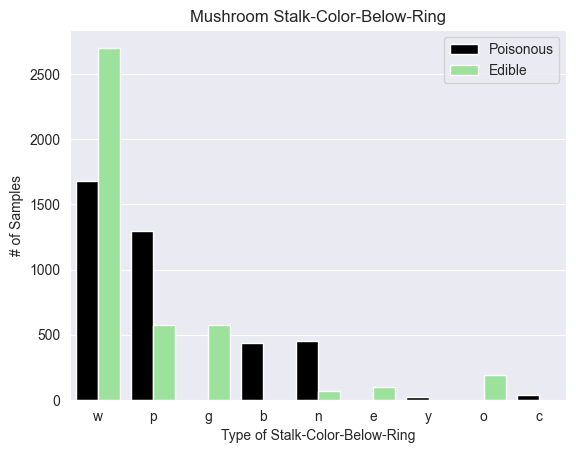

None


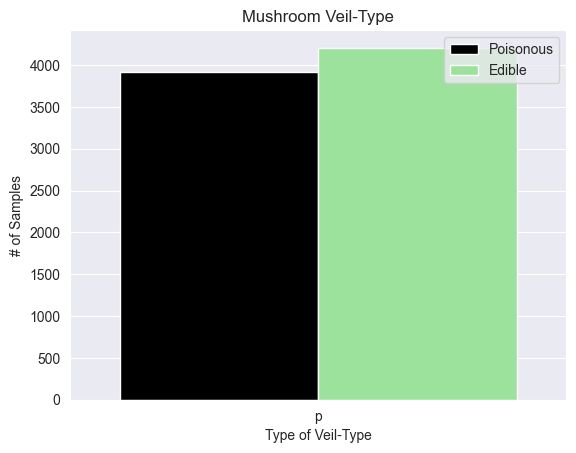

None


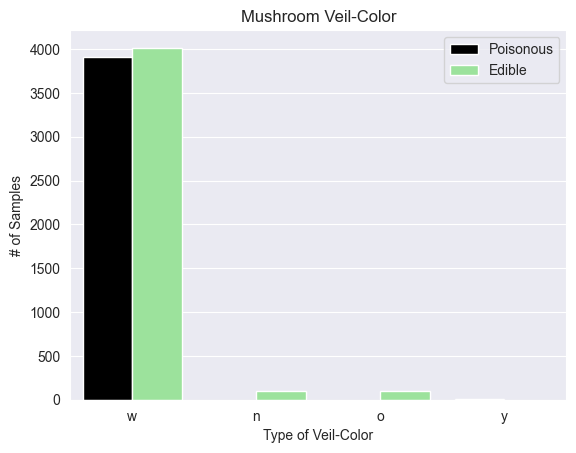

None


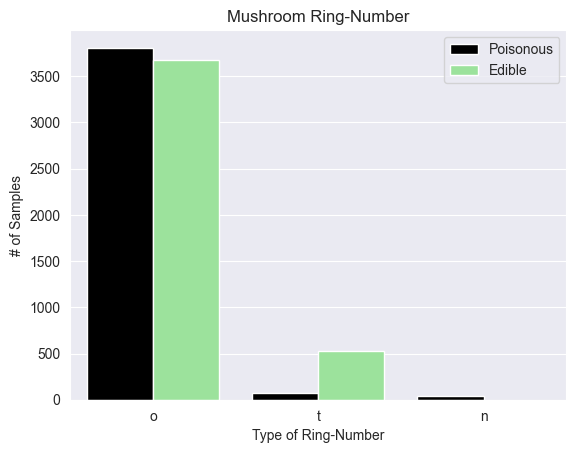

None


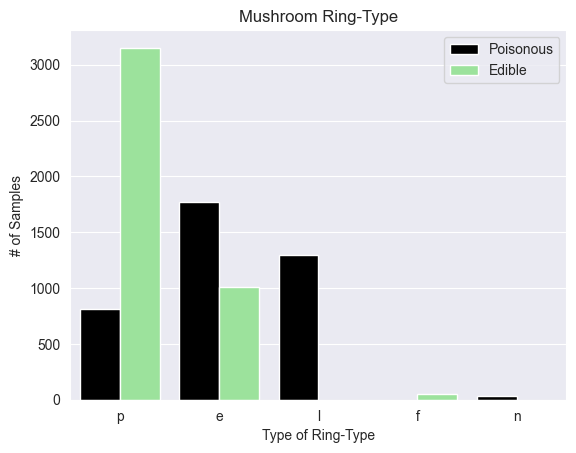

None


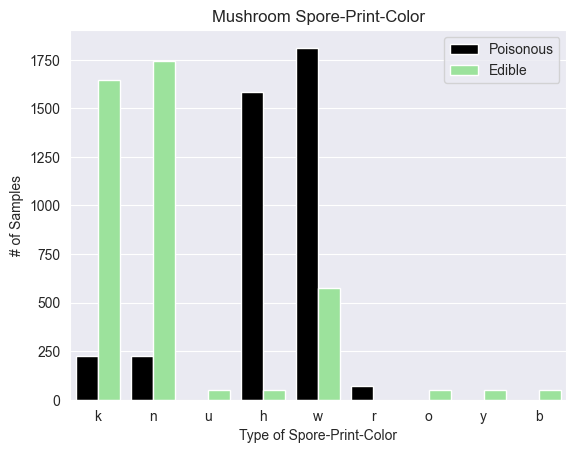

None


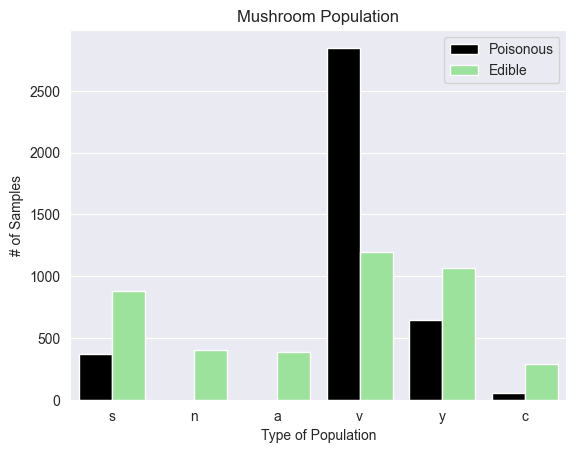

None


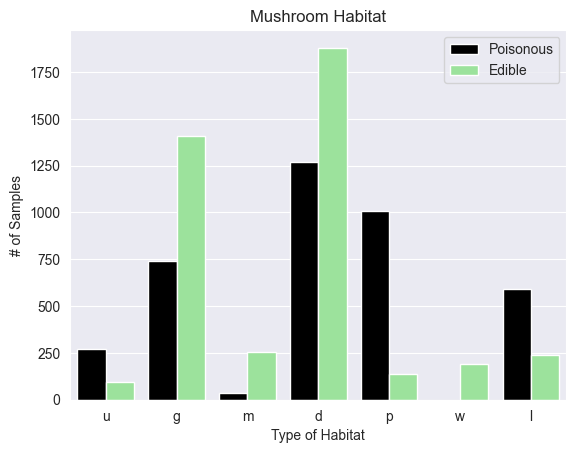

None


In [14]:


def featureclassplot(col):
    fig, ax = plt.subplots()
    sns.set_style('darkgrid')
    sns.countplot(x=col, hue='class', palette=['black', 'lightgreen'], data=df)
    plt.ylabel('# of Samples')
    plt.xlabel('Type of' + ' ' + col.title())
    plt.title('Mushroom' + ' ' + col.title())
    plt.legend(title=None, labels=['Poisonous', 'Edible'])
    plt.show()

for i in df.columns:
  print(featureclassplot(i))


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
categorical_features = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [17]:
# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OneHotEncoder(sparse_output=False, handle_unknown='ignore', categories='auto')),
    ('scaler',StandardScaler())
    ]
)

In [18]:
preprocessor = ColumnTransformer([
    ('cat_pipeline', cat_pipeline, categorical_features)
])

In [19]:
df['class'] = df['class'].map({'e': 0, 'p': 1})

In [20]:
X = df.drop(['class'], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [21]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

6499 1625 6499 1625


In [22]:
preprocessor.fit_transform(X_train)

array([[-0.23965753, -0.02149006, -0.78348993, ..., -0.40221944,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006, -0.78348993, ...,  2.48620503,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006,  1.27634059, ..., -0.40221944,
        -0.21533542, -0.16139978],
       ...,
       [-0.23965753, -0.02149006,  1.27634059, ...,  2.48620503,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006, -0.78348993, ...,  2.48620503,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006, -0.78348993, ..., -0.40221944,
        -0.21533542, -0.16139978]])

In [23]:
preprocessor.transform(X_test)

array([[-0.23965753, -0.02149006,  1.27634059, ..., -0.40221944,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006,  1.27634059, ..., -0.40221944,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006, -0.78348993, ..., -0.40221944,
        -0.21533542, -0.16139978],
       ...,
       [-0.23965753, -0.02149006, -0.78348993, ...,  2.48620503,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006, -0.78348993, ...,  2.48620503,
        -0.21533542, -0.16139978],
       [-0.23965753, -0.02149006, -0.78348993, ...,  2.48620503,
        -0.21533542, -0.16139978]])

In [24]:
X_train.shape

(6499, 22)

In [25]:
preprocessor.get_feature_names_out()

array(['cat_pipeline__cap-shape_b', 'cat_pipeline__cap-shape_c',
       'cat_pipeline__cap-shape_f', 'cat_pipeline__cap-shape_k',
       'cat_pipeline__cap-shape_s', 'cat_pipeline__cap-shape_x',
       'cat_pipeline__cap-surface_f', 'cat_pipeline__cap-surface_g',
       'cat_pipeline__cap-surface_s', 'cat_pipeline__cap-surface_y',
       'cat_pipeline__cap-color_b', 'cat_pipeline__cap-color_c',
       'cat_pipeline__cap-color_e', 'cat_pipeline__cap-color_g',
       'cat_pipeline__cap-color_n', 'cat_pipeline__cap-color_p',
       'cat_pipeline__cap-color_r', 'cat_pipeline__cap-color_u',
       'cat_pipeline__cap-color_w', 'cat_pipeline__cap-color_y',
       'cat_pipeline__bruises_f', 'cat_pipeline__bruises_t',
       'cat_pipeline__odor_a', 'cat_pipeline__odor_c',
       'cat_pipeline__odor_f', 'cat_pipeline__odor_l',
       'cat_pipeline__odor_m', 'cat_pipeline__odor_n',
       'cat_pipeline__odor_p', 'cat_pipeline__odor_s',
       'cat_pipeline__odor_y', 'cat_pipeline__gill-attachment

In [26]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [27]:
X_train.head()

,cat_pipeline__cap-shape_b,cat_pipeline__cap-shape_c,cat_pipeline__cap-shape_f,cat_pipeline__cap-shape_k,cat_pipeline__cap-shape_s,cat_pipeline__cap-shape_x,cat_pipeline__cap-surface_f,cat_pipeline__cap-surface_g,cat_pipeline__cap-surface_s,cat_pipeline__cap-surface_y,...,cat_pipeline__population_s,cat_pipeline__population_v,cat_pipeline__population_y,cat_pipeline__habitat_d,cat_pipeline__habitat_g,cat_pipeline__habitat_l,cat_pipeline__habitat_m,cat_pipeline__habitat_p,cat_pipeline__habitat_u,cat_pipeline__habitat_w
0,-0.239658,-0.02149,-0.783490,2.906238,-0.06459,-0.913412,-0.629868,-0.02149,1.474225,-0.817125,...,-0.423917,1.009741,-0.517781,1.259425,-0.598738,-0.341565,-0.193262,-0.402219,-0.215335,-0.1614
1,-0.239658,-0.02149,-0.783490,-0.344087,-0.06459,1.094796,-0.629868,-0.02149,1.474225,-0.817125,...,-0.423917,1.009741,-0.517781,-0.794013,-0.598738,-0.341565,-0.193262,2.486205,-0.215335,-0.1614
2,-0.239658,-0.02149,1.276341,-0.344087,-0.06459,-0.913412,-0.629868,-0.02149,-0.678322,1.223803,...,-0.423917,1.009741,-0.517781,-0.794013,-0.598738,2.927700,-0.193262,-0.402219,-0.215335,-0.1614
3,-0.239658,-0.02149,1.276341,-0.344087,-0.06459,-0.913412,1.587635,-0.02149,-0.678322,-0.817125,...,-0.423917,1.009741,-0.517781,1.259425,-0.598738,-0.341565,-0.193262,-0.402219,-0.215335,-0.1614
4,4.172621,-0.02149,-0.783490,-0.344087,-0.06459,-0.913412,-0.629868,-0.02149,-0.678322,1.223803,...,-0.423917,-0.990353,-0.517781,-0.794013,-0.598738,-0.341565,5.174312,-0.402219,-0.215335,-0.1614


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [29]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeRegressor':DecisionTreeClassifier(),
    'RandomForestRegressor':RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVC': SVC(),
    'GaussianNB': GaussianNB()

    }

In [30]:
trained_model_list=[]
model_list = []
score_list = []

In [31]:
list(models)

['LogisticRegression',
 'DecisionTreeRegressor',
 'RandomForestRegressor',
 'KNN',
 'SVC',
 'GaussianNB']

In [32]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
KNeighborsClassifier()
SVC()
GaussianNB()


In [33]:
from sklearn.metrics import accuracy_score,classification_report
def evaluate_regression_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    report = classification_report(true,predicted)
    return accuracy,'/n',print(report)



In [34]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_test_pred = model.predict(X_test)
    y_train_pred= model.predict(X_train)

    # This is a validation (test) score
    train_model_score = evaluate_regression_model(y_train, y_train_pred)
    test_model_score = evaluate_regression_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Train_Score:", train_model_score)
    print("Test_Score:", test_model_score)

    score_list.append(test_model_score)

    print('=' * 35)
    print('\n')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       1.00      1.00      1.00      6499
weighted avg       1.00      1.00      1.00      6499

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

LogisticRegression
Model Training Performance
Train_Score: (1.0, '/n', None)
Test_Score: (1.0, '/n', None)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3365
           1       1.00      1.00      1.00      3134

    accuracy                           1.00      6499
   macro avg       

All models give more than 95% accuracy

In [35]:
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [36]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
accuracy = accuracy_score(pred,y_test)
print(accuracy)

1.0


In [37]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [38]:
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [39]:
import pandas as pd

def prediction(cap_shape,
               cap_surface,
               cap_color,
               bruises,
               odor,
               gill_attachment,
               gill_spacing,
               gill_size,
               gill_color,
               stalk_shape,
               stalk_root,
               stalk_surface_above_ring,
               stalk_surface_below_ring,
               stalk_color_above_ring,
               stalk_color_below_ring,
               veil_type,
               veil_color,
               ring_number,
               ring_type,
               spore_print_color,
               population,
               habitat
               ):

    # Create a dictionary with input features
    data_dict = {
        'cap-shape': cap_shape,
        'cap-surface': cap_surface,
        'cap-color': cap_color,
        'bruises': bruises,
        'odor': odor,
        'gill-attachment': gill_attachment,
        'gill-spacing': gill_spacing,
        'gill-size': gill_size,
        'gill-color': gill_color,
        'stalk-shape': stalk_shape,
        'stalk-root': stalk_root,
        'stalk-surface-above-ring': stalk_surface_above_ring,
        'stalk-surface-below-ring': stalk_surface_below_ring,
        'stalk-color-above-ring': stalk_color_above_ring,
        'stalk-color-below-ring': stalk_color_below_ring,
        'veil-type': veil_type,
        'veil-color': veil_color,
        'ring-number': ring_number,
        'ring-type': ring_type,
        'spore-print-color': spore_print_color,
        'population': population,
        'habitat': habitat
    }

    # Convert the dictionary to a DataFrame
    data = pd.DataFrame([data_dict])

    # Use the preprocessor to transform the data
    pipe = preprocessor.transform(data)

    # Use the trained model to make predictions
    pred = model.predict(pipe)

    # Display the result
    if pred == 1:
        print('Poisonous Mushroom')
    else:
        print('Good mushroom')

In [40]:
prediction('x','s','n','t','p','f','c','n','k','e','e','s','s','w','w','p','w','o','p','k','s','u')

Poisonous Mushroom


c:\Users\Vijai vikram\Desktop\python_programming\Mushroom Classification\mushroom_classification\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [41]:
prediction('x', 's', 'y', 't', 'a', 'f', 'c', 'b', 'k', 'e', 'c', 's', 's', 'w', 'w', 'p', 'w', 'o', 'p', 'n', 'n', 'g')


Good mushroom


c:\Users\Vijai vikram\Desktop\python_programming\Mushroom Classification\mushroom_classification\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
